<a href="https://colab.research.google.com/github/swostika17/Course_Work-6005-AI-/blob/main/Part1_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers

# SHAP for explainability
!pip install shap
import shap


In [ ]:
# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reshape for CNN & ANN
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (60000, 28, 28, 1)
Test: (10000, 28, 28, 1)


In [ ]:
# Flatten for Decision Tree
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=20, random_state=42)
dt.fit(X_train_scaled, y_train)

# Predict
y_pred_dt = dt.predict(X_test_scaled)


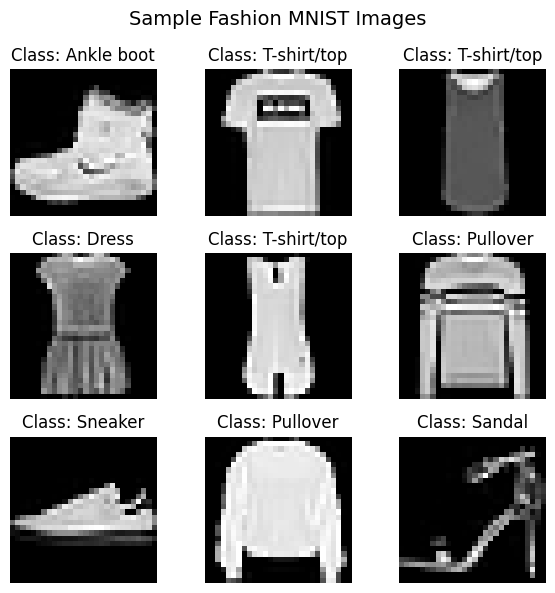

In [ ]:
# Sample image visualisation
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Class: {classes[y_train[i]]}")
    plt.axis('off')

plt.suptitle("Sample Fashion MNIST Images", fontsize=14)
plt.tight_layout()
plt.show()



Decision Tree Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.76      0.76      0.76      1000
     Trouser       0.96      0.95      0.95      1000
    Pullover       0.64      0.65      0.65      1000
       Dress       0.82      0.78      0.80      1000
        Coat       0.65      0.65      0.65      1000
      Sandal       0.91      0.88      0.89      1000
       Shirt       0.54      0.55      0.54      1000
     Sneaker       0.88      0.90      0.89      1000
         Bag       0.90      0.92      0.91      1000
  Ankle boot       0.91      0.92      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



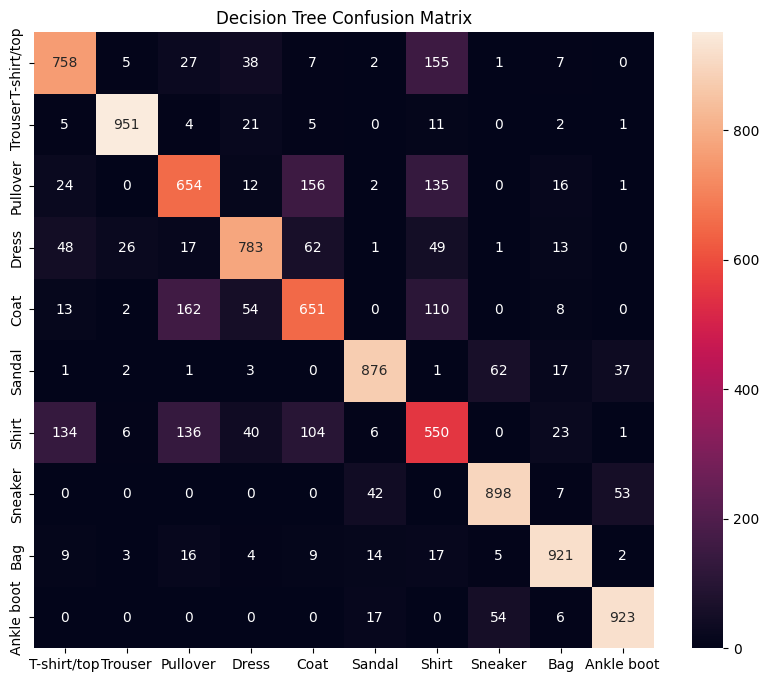

In [ ]:
print("\nDecision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt, target_names=classes))

cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history_ann = ann.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7803 - loss: 0.6302 - val_accuracy: 0.8550 - val_loss: 0.3958
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8621 - loss: 0.3723 - val_accuracy: 0.8607 - val_loss: 0.3823
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8759 - loss: 0.3322 - val_accuracy: 0.8727 - val_loss: 0.3493
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8832 - loss: 0.3100 - val_accuracy: 0.8644 - val_loss: 0.3660
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8893 - loss: 0.2933 - val_accuracy: 0.8777 - val_loss: 0.3275
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9015 - loss: 0.2675 - val_accuracy: 0.8813 - val_loss: 0.3231
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9028 - loss: 0.2581 - val_accuracy: 0.8838 - val_loss: 0.3259
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9085 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

ANN Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.87      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.79      0.81      0.80      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.81      0.82      0.81      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.75      0.66      0.70      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



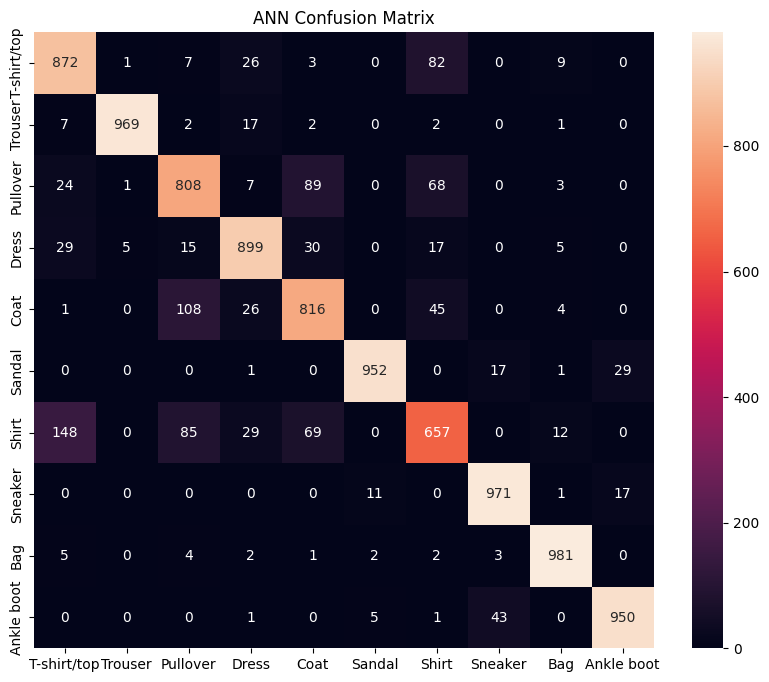

In [ ]:
y_pred_ann = np.argmax(ann.predict(X_test), axis=1)

print("\nANN Classification Report:\n")
print(classification_report(y_test, y_pred_ann, target_names=classes))

cm = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title("ANN Confusion Matrix")
plt.show()


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_cnn = cnn.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7612 - loss: 0.6591 - val_accuracy: 0.8654 - val_loss: 0.3660
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.8805 - loss: 0.3273 - val_accuracy: 0.8859 - val_loss: 0.3154
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.8986 - loss: 0.2745 - val_accuracy: 0.8935 - val_loss: 0.2874
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.9090 - loss: 0.2390 - val_accuracy: 0.9009 - val_loss: 0.2667
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - accuracy: 0.9217 - loss: 0.2097 - val_accuracy: 0.9051 - val_loss: 0.2618
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.9295 - loss: 0.1858 - val_accuracy: 0.9044 - val_loss: 0.2646
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9399 - loss: 0.1594 - val_accuracy: 0.9118 - val_loss: 0.2518
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.9468 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step

CNN Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.87      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.89      0.80      0.85      1000
       Dress       0.91      0.92      0.92      1000
        Coat       0.84      0.89      0.87      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.75      0.73      0.74      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



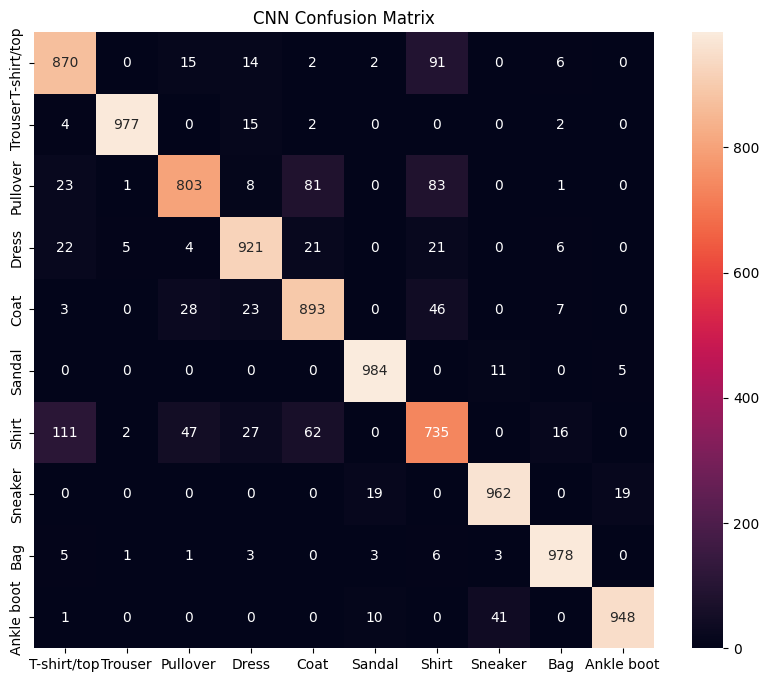

In [ ]:
y_pred_cnn = np.argmax(cnn.predict(X_test), axis=1)

print("\nCNN Classification Report:\n")
print(classification_report(y_test, y_pred_cnn, target_names=classes))

cm = confusion_matrix(y_test, y_pred_cnn)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title("CNN Confusion Matrix")
plt.show()


In [ ]:
# Reduce dataset for SHAP speed
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]


In [ ]:
explainer = shap.DeepExplainer(cnn, background)


/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=['Tensor(shape=(100, 28, 28, 1))']
  warnings.warn(msg)


In [ ]:
test_images = X_test[:10]  # explain 10 images
shap_values = explainer.shap_values(test_images)


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=['Tensor(shape=(200, 28, 28, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=['Tensor(shape=(10, 28, 28, 1))']
  warnings.warn(msg)


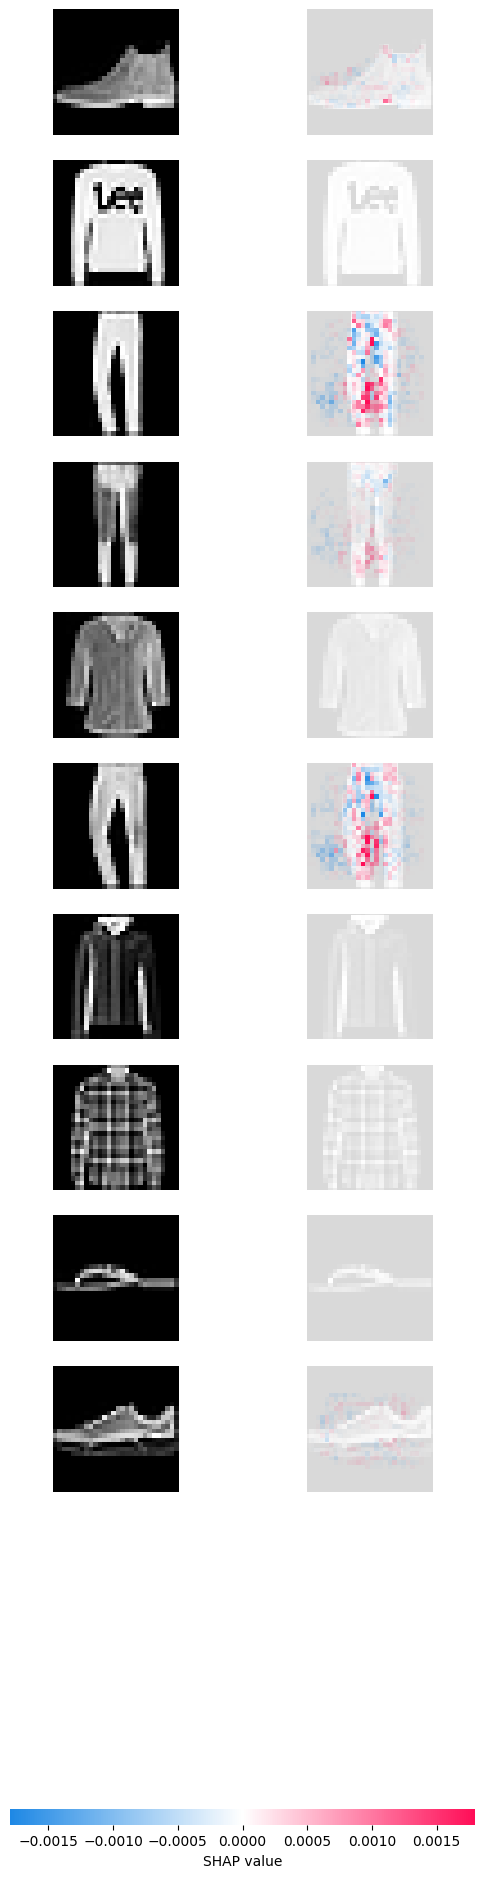

In [ ]:
shap.image_plot(shap_values, test_images)
